In [12]:
import pandas as pd
import numpy as np

# Зчитування таблиці з URL та використання колонки "Коефіцієнт народжуваності в регіонах України"
df = pd.read_html("https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8#%D0%9D%D0%B0%D1%80%D0%BE%D0%B4%D0%B6%D1%83%D0%B2%D0%B0%D0%BD%D1%96%D1%81%D1%82%D1%8C",
                   match="Коефіцієнт народжуваності в регіонах України")

# Извлекаем таблицу из полученных данных и присваиваем ее переменной df
df = df[0]

# Вивід перших 5 рядків таблиці
print(df.head(30))

               Регіон   1950   1960   1970  1990  2000  2012 2014 2019
0                Крим  230.0  206.0  160.0   130    73   126    —    —
1           Вінницька  224.0  192.0  142.0   124    84   112  109   76
2           Волинська  247.0  250.0  179.0   153   112   148  141  101
3    Дніпропетровська  204.0  204.0  151.0   123    71   112  111   71
4            Донецька  271.0  214.0  140.0   109    61    98   82    —
5         Житомирська  261.0  223.0  159.0   129    89   122  120   79
6        Закарпатська  314.0  273.0  207.0   168   115   151  146  104
7          Запорізька  219.0  197.0  150.0   124    71   106  106   68
8   Івано-Франківська  243.0  248.0  182.0   155   103   124  122   88
9            Київська  204.0  189.0  156.0   123    73   122  121   80
10     Кіровоградська  216.0  171.0  145.0   126    79   110  108   68
11          Луганська  262.0  235.0  144.0   116    62    96   51    —
12          Львівська  234.0  240.0  171.0   140    91   119  119   87
13    

In [24]:
# Визначення розмірності датафрейму
print("Розмірність датафрейму: ", df.shape, sep='\n')

Розмірність датафрейму: 
(27, 9)


In [25]:
# Заменяем в таблице значения "—" на NaN
df.replace('—', np.nan, inplace=True)

# Виводимо типи всіх стовпців
print('Colums type: ', df.dtypes, sep='\n')

Colums type: 
Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014      float64
2019      float64
dtype: object


In [26]:
# Конвертируем колонки в числовые значения
df.iloc[:, 1:-1] = df.iloc[:, 1:-1].astype(float)
# Подсчитываем количество пропущенных значений в каждой колонке
missing_values_count = df.isnull().sum()

# Подсчитываем общее количество значений в каждой колонке
total_values_count = df.shape[0]

# Считаем долю пропущенных значений в каждой колонке
missing_values_ratio = missing_values_count / total_values_count

# Выводим результат
print('Частка пропусків: ', missing_values_ratio, sep='\n')

Частка пропусків: 
Регіон    0.0
1950      0.0
1960      0.0
1970      0.0
1990      0.0
2000      0.0
2012      0.0
2014      0.0
2019      0.0
dtype: float64


In [27]:
# Удаляем последний рядок из таблицы
df.drop(df.tail(1).index, inplace=True)

# Выводим обновленную таблицу
print('New table 1', df, sep='\n')

New table 1
               Регіон    1950   1960   1970   1990   2000   2012    2014  \
0                Крим  230.00  206.0  160.0  130.0   73.0  126.0  111.44   
1           Вінницька  224.00  192.0  142.0  124.0   84.0  112.0  109.00   
2           Волинська  247.00  250.0  179.0  153.0  112.0  148.0  141.00   
3    Дніпропетровська  204.00  204.0  151.0  123.0   71.0  112.0  111.00   
4            Донецька  271.00  214.0  140.0  109.0   61.0   98.0   82.00   
5         Житомирська  261.00  223.0  159.0  129.0   89.0  122.0  120.00   
6        Закарпатська  314.00  273.0  207.0  168.0  115.0  151.0  146.00   
7          Запорізька  219.00  197.0  150.0  124.0   71.0  106.0  106.00   
8   Івано-Франківська  243.00  248.0  182.0  155.0  103.0  124.0  122.00   
9            Київська  204.00  189.0  156.0  123.0   73.0  122.0  121.00   
10     Кіровоградська  216.00  171.0  145.0  126.0   79.0  110.0  108.00   
11          Луганська  262.00  235.0  144.0  116.0   62.0   96.0   51.00   


In [28]:
# Вычисляем средние значения только для числовых столбцов
mean_values = df.select_dtypes(include='number').mean()

# Заменяем отсутствующие данные средними значениями столбцов
df.fillna(mean_values, inplace=True)

# Выводим обновленную таблицу
print('New table 2', df.to_string(index=False, header=True), sep='\n')

New table 2
           Регіон   1950  1960  1970  1990  2000  2012   2014       2019
             Крим 230.00 206.0 160.0 130.0  73.0 126.0 111.44  80.173913
        Вінницька 224.00 192.0 142.0 124.0  84.0 112.0 109.00  76.000000
        Волинська 247.00 250.0 179.0 153.0 112.0 148.0 141.00 101.000000
 Дніпропетровська 204.00 204.0 151.0 123.0  71.0 112.0 111.00  71.000000
         Донецька 271.00 214.0 140.0 109.0  61.0  98.0  82.00  80.173913
      Житомирська 261.00 223.0 159.0 129.0  89.0 122.0 120.00  79.000000
     Закарпатська 314.00 273.0 207.0 168.0 115.0 151.0 146.00 104.000000
       Запорізька 219.00 197.0 150.0 124.0  71.0 106.0 106.00  68.000000
Івано-Франківська 243.00 248.0 182.0 155.0 103.0 124.0 122.00  88.000000
         Київська 204.00 189.0 156.0 123.0  73.0 122.0 121.00  80.000000
   Кіровоградська 216.00 171.0 145.0 126.0  79.0 110.0 108.00  68.000000
        Луганська 262.00 235.0 144.0 116.0  62.0  96.0  51.00  80.173913
        Львівська 234.00 240.0 171.0 14

In [29]:
# Перетворення значень стовпця "2019" на числовий тип
df["2019"] = pd.to_numeric(df["2019"], errors="coerce")

# Обчислення середнього значення по стовпцю "2019"
mean_value = df["2019"].mean()

# Створення списку регіонів з рівнем народжуваності вищим за середній по Україні
region_list = list(df[df["2019"] > mean_value]["Регіон"])

# Виведення списку регіонів
print('Cписок регіонів, де рівень народжуваності у 2019 році був вищим за середній по Україні: ', region_list, sep='\n')

Cписок регіонів, де рівень народжуваності у 2019 році був вищим за середній по Україні: 
['Волинська', 'Закарпатська', 'Івано-Франківська', 'Львівська', 'Одеська', 'Рівненська', 'Херсонська', 'Чернівецька', 'Київ']


In [30]:
# Вибираємо стовпець з народжуваністю за 2014 рік
birth_rate_2014 = df['2014'].astype(float)

# Знаходимо індекс рядка з максимальним значенням
max_index = birth_rate_2014.idxmax()

# Отримуємо назву регіону за знайденим індексом рядка
region_with_highest_birth_rate = df.loc[max_index, 'Регіон']

# Виводимо результат
print(f"Найвища народжуваність у 2014 році була у регіоні {region_with_highest_birth_rate}")


Найвища народжуваність у 2014 році була у регіоні Рівненська


Text(0.5, 1.0, 'Birth rate by region in 2019')

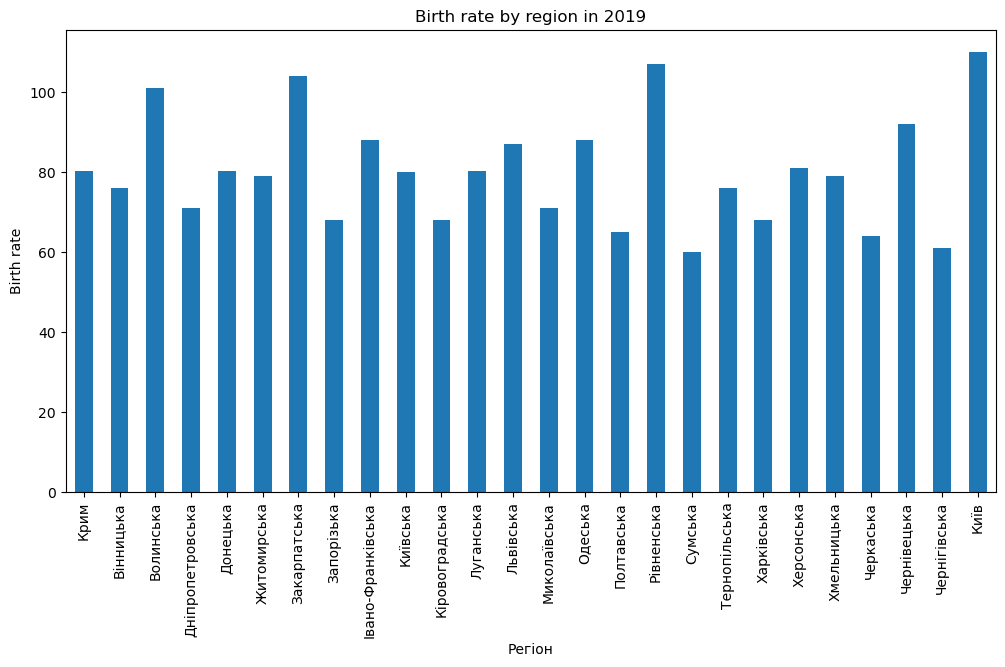

In [31]:
ax = df.plot(x='Регіон', y='2019', kind='bar', figsize=(12, 6), legend=None)
ax.set_xlabel('Регіон')
ax.set_ylabel('Birth rate')
ax.set_title('Birth rate by region in 2019')